**Nome:** Pedro Henrique Silva Domingues

**R.A.:** 122.103-5

### Bibliotecas

In [1]:
import cv2 # OpenCV - Para carregar imagem do disco
import matplotlib.pyplot as plt # Para plot de grafico e exibir imagem
import numpy as np # Para operação em arrays
from functools import partial # Manipular funções
from sklearn.cluster import KMeans # Scikit learn - para usar os algoritmos de clusterização

### Constantes

In [2]:
IMG_PATH = './images/test_image.jpg' # Caminho da imagem que sera utilizada

### Funções auxiliares

In [3]:
# Mostra a imagem no notebook
def show_image(image, ax=None, rgb=False):
    cmap = None if rgb else 'gray'
    if ax is None:
        plt.figure()
        plt.imshow(image, cmap=cmap)
        plt.axis('off')
    else:
        ax.imshow(image, cmap=cmap)
        ax.axis('off')

# Plota o histograma calculado previamente
def plot_histogram(hist, thresholds=[], ax=None):
    if ax is None:
        plt.figure()
        plotter = plt
    else:
        plotter = ax
    plotter.bar(range(256), hist)
    for n, threshold in enumerate(thresholds):
        c = plt.cm.get_cmap('Set1', len(thresholds))
        plotter.axvline(threshold, ls='--', c=c(n), label=f'threshold ({threshold})')
        plotter.legend()

# Cria o histograma da imagem
def histogram(image, density=False):
    hist, _ = np.histogram(image, bins=256, range=(0, 255))
    return hist

def apply_threshold(img, thresholds, reversed=False):
    def get_color_idx(value, thresholds):
        for idx, threshold in enumerate(sorted(thresholds)):
            if value <= threshold:
                return idx
        return len(thresholds)
    colors = [int(i*255/len(thresholds)) for i in range(len(thresholds)+1)][::-1 if reversed else 1]
    img_copy = img.copy()
    func = lambda value: colors[get_color_idx(value, thresholds)]
    return np.vectorize(func)(img_copy).astype(np.uint8)

### Carregando dados

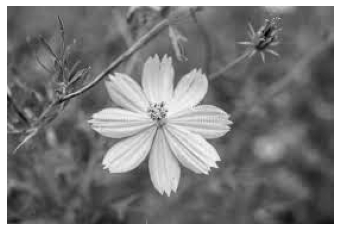

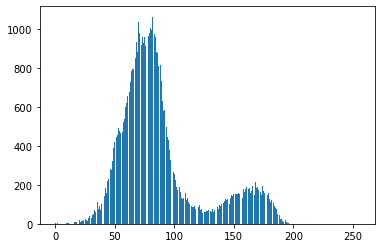

In [4]:
# Load the image
img = cv2.imread(IMG_PATH, 0)
img_histogram = histogram(img)
# Display the image
show_image(img)
# Plot the histogram
plot_histogram(img_histogram)

---

### 1. Equalizando imagem

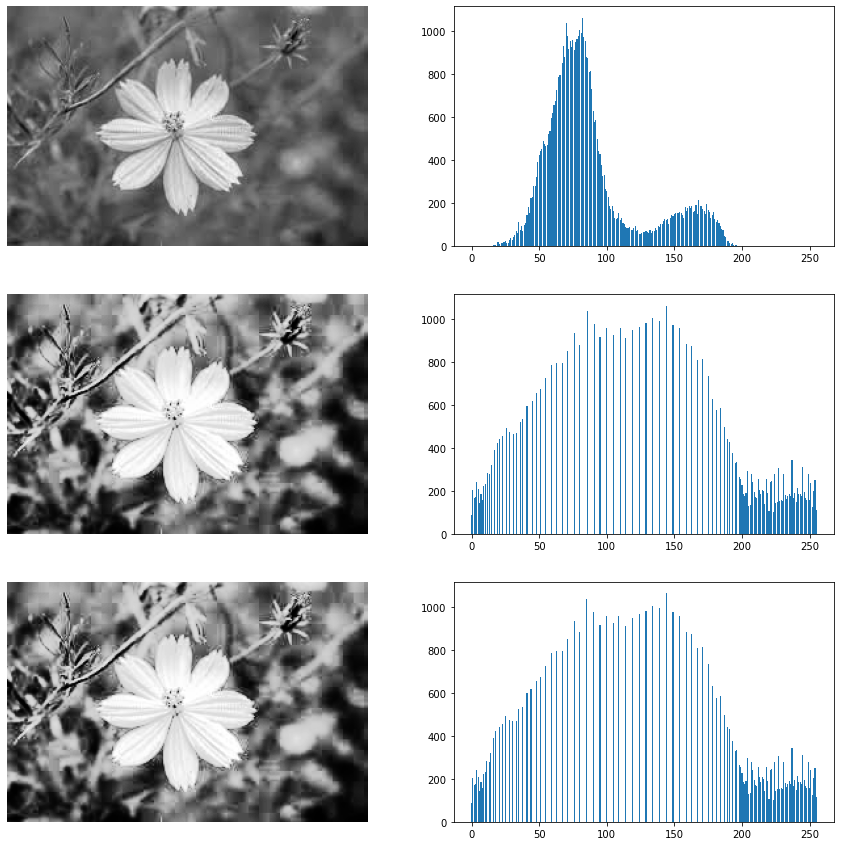

In [10]:
img2 = cv2.equalizeHist(img)
img3 = cv2.equalizeHist(img2)

fig, ax = plt.subplots(3,2, figsize=(15,15))

show_image(img,  ax=ax[0][0])
show_image(img2, ax=ax[1][0])
show_image(img3, ax=ax[2][0])

plot_histogram(histogram(img),  ax=ax[0][1])
plot_histogram(histogram(img2), ax=ax[1][1])
plot_histogram(histogram(img3), ax=ax[2][1])

---

### 2

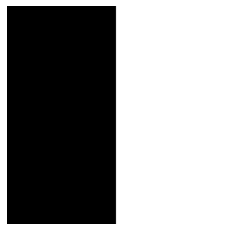

In [11]:
WIDTH = 500
HEIGHT = 500

img1 = np.zeros((WIDTH, HEIGHT))
img2 = np.zeros((WIDTH, HEIGHT))

for i in range(HEIGHT):
    for j in range(WIDTH):
        img1[i][j] = 0 if j < WIDTH / 2 else 1
show_image(img1)


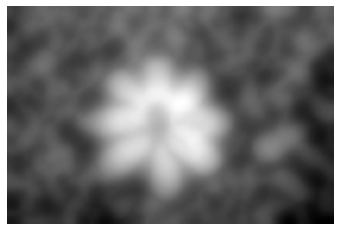

In [17]:
# Create a 3x3 Kernel
kernel = np.ones((3,3), np.float32)/9
# Apply convolution between image and 3x3 Kernel
result = img.copy()
for i in range(2000):
    result = cv2.filter2D(result,-1, kernel)
show_image(result)